<a href="https://colab.research.google.com/github/Aman-Maheshwari7/Stock-Prediction/blob/master/Stock-prediction-GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation,GRU
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
import csv
import pandas as pd
%matplotlib inline
!pip install --upgrade mplfinance
import mplfinance as mplf

     |████████████████████████████████| 62 kB 838 kB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/My Drive/SBIN.NS.csv")

In [5]:
df1= df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1232 non-null   object 
 1   Open       1232 non-null   float64
 2   High       1232 non-null   float64
 3   Low        1232 non-null   float64
 4   Close      1232 non-null   float64
 5   Adj Close  1232 non-null   float64
 6   Volume     1232 non-null   float64
dtypes: float64(6), object(1)
memory usage: 77.0+ KB


/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


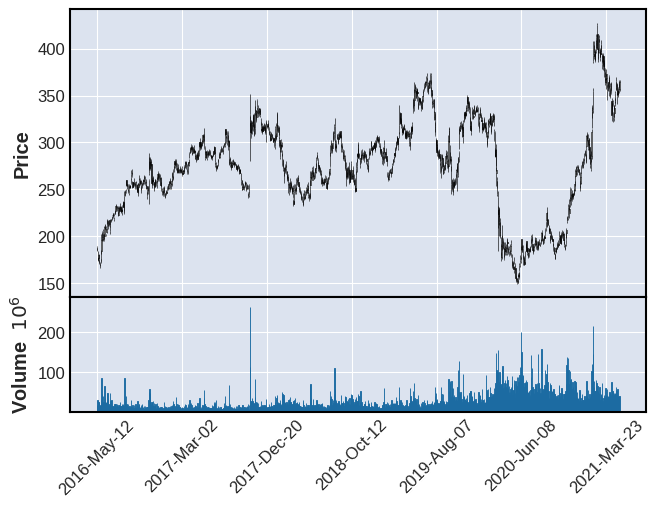

In [6]:
# OHLC Candlestick chart visualization

#Converting 'Date' (object datatype) to datetime64[ns] & setting it as index for plotting OHLC.
df_ohlc = df1.copy()
df_ohlc.Date = pd.to_datetime(df1.Date)
df_ohlc = df_ohlc.set_index('Date')

#Plot candlestick graph for April-2021.
mplf.plot(df_ohlc, type='candle', volume=True)


In [7]:
from sklearn.model_selection import train_test_split
training_set,test_set=train_test_split(df1,test_size=0.3,shuffle=False)

In [8]:
df_train  = training_set.iloc[:,4:5]  #if considering only closing price for prediction. 
df_test   = test_set.iloc[:,4:5]      #if considering only closing price for prediction. 
m_train   = training_set.shape[0]
m_test    = test_set.shape[0]
print(m_train,",", m_test)

862 , 370


In [9]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(df_train)
training_set_scaled.size

862

In [13]:
X_train = []
y_train = []
for i in range(60, m_train):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(802, 60, 1)

In [18]:
from keras.optimizers import SGD

regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.8, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=200,batch_size=32)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
26/26 [==============================] - 10s 122ms/step - loss: 0.1166
Epoch 2/200
26/26 [==============================] - 3s 122ms/step - loss: 0.0236
Epoch 3/200
26/26 [==============================] - 3s 123ms/step - loss: 0.0162
Epoch 4/200
26/26 [==============================] - 3s 121ms/step - loss: 0.0164
Epoch 5/200
26/26 [==============================] - 3s 121ms/step - loss: 0.0142
Epoch 6/200
26/26 [==============================] - 3s 122ms/step - loss: 0.0136
Epoch 7/200
26/26 [==============================] - 3s 122ms/step - loss: 0.0106
Epoch 8/200
26/26 [==============================] - 3s 120ms/step - loss: 0.0106
Epoch 9/200
26/26 [==============================] - 3s 121ms/step - loss: 0.0087
Epoch 10/200
26/26 [==============================] - 3s 121ms/step - loss: 0.0086
Epoch 11/200
26/26 [==============================] - 3s 122ms/step - loss: 0.0086
Epoch 12/200
26/26 [==============================] - 3s 122ms/step - loss: 0.0062
Epoch 13/200

In [19]:
sc = MinMaxScaler(feature_range = (0, 1))
test_set_scaled = sc.fit_transform(df_test)
X_test = []
y_test = []
for i in range(60, m_test):
    X_test.append(training_set_scaled[i-60:i, 0])
    y_test.append(training_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))

In [20]:
predicted = regressorGRU.predict(X_test, batch_size=32)
predicted_stock_price = sc.inverse_transform(predicted)
y = sc.inverse_transform(y_test)

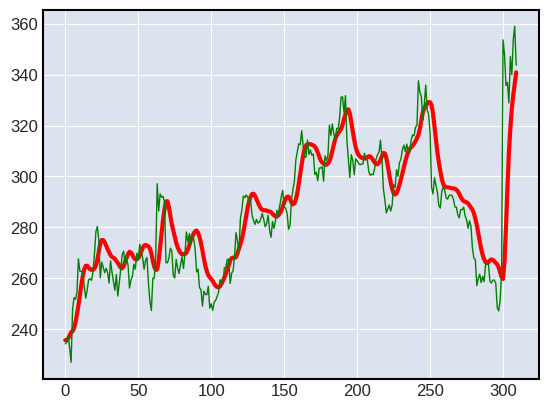

In [21]:
import matplotlib.pyplot as plt
plt.plot(predicted_stock_price, color = 'red', linewidth=3 )
plt.plot(y, color='green', linewidth=1)
plt.show()

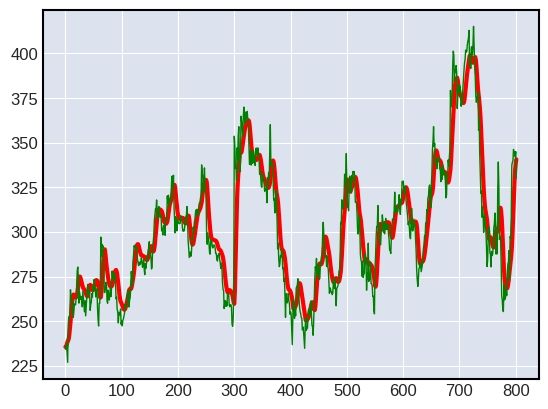

In [23]:
predicted = regressorGRU.predict(X_train, batch_size=32)
predicted_stock_price = sc.inverse_transform(predicted)
y_train = np.reshape(y_train, (y_train.shape[0], 1))
y = sc.inverse_transform(y_train)
plt.plot(predicted_stock_price, color = 'red', linewidth=3 )
plt.plot(y, color='green', linewidth=1)
plt.show()